In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `C:\Users\tge13\Documents\optimal_control_julia\lec_16\Project.toml`


In [2]:
using LinearAlgebra
using Plots

## Continuous Dynamics

In [3]:
function dynamics(x)
    g = 9.81
    return [x[3], x[4], 0, -g]
end

function dynamics_rk4(x)
    #RK4 integration with zero-order hold on u
    f1 = dynamics(x)
    f2 = dynamics(x + 0.5*h*f1)
    f3 = dynamics(x + 0.5*h*f2)
    f4 = dynamics(x + h*f3)
    return x + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
end

dynamics_rk4 (generic function with 1 method)

## Guard function

In [4]:
function guard(x)
    return x[2]
end

guard (generic function with 1 method)

## Jump map

In [8]:
function jump(x)
    #Flip sign of vertical component of velocity and multiply by coefficient of restitution
    # γ = 0.0
    γ = 0.9
    return [x[1], 0, x[3], -γ*x[4]]
end

jump (generic function with 1 method)

## Bouncing Ball Simulation

In [9]:
#Initial Conditions
r0 = [0; 1.0]
v0 = [1.0; 0]
x0 = [r0; v0];

In [10]:
#Simulate
Nx = 4
h = 0.01 #100 Hz
Tfinal = 3.0 # final time
Nt = Int(Tfinal/h)+1   # number of time steps
thist = Array(range(0,h*(Nt-1), step=h));
xhist = zeros(Nx,Nt)

xhist[:,1] = x0
for i in 1:(Nt-1)
    xhist[:,i+1] = dynamics_rk4(xhist[:,i])
    if guard(xhist[:,i+1]) <= 0
        # interpolate back to guard=0
        xhist[:,i+1] = jump(xhist[:,i+1])
    end
end

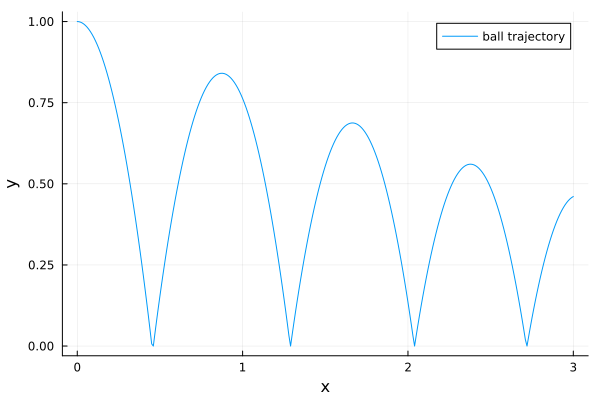

In [15]:
plot(xhist[1,:],xhist[2,:], label = "ball trajectory", xlabel = "x", ylabel = "y")

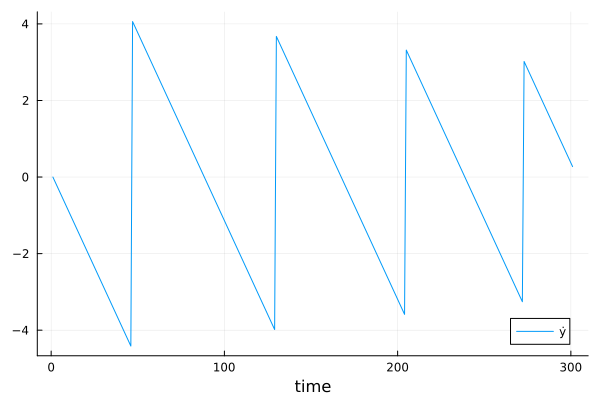

In [13]:
plot(xhist[4,:], label = "ẏ", xlabel = "time")